In [ ]:
!sudo apt install python3-dev libopenblas-dev libxc-dev libscalapack-mpi-dev libfftw3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenblas-dev is already the newest version (0.3.20+ds-1).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
  libscalapack-openmpi-dev libscalapack-openmpi2.1 libxc9
Suggested packages:
  libfftw3-doc scalapack-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-double3 libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libscalapack-mpi-dev libscalapack-openmpi-dev
  libscalapack-openmpi2.1 libxc-dev libxc9
0 upgraded, 11 newly installed, 0 to remove and 45 not upgraded.
Need to get 18.1 MB of archives.
After this operation, 71.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu8 [770 kB]
Get:2

In [ ]:
!pip install ase
!pip install gpaw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gpaw: filename=gpaw-24.1.0-cp310-cp310-linux_x86_64.whl size=2759326 sha256=2df4c9d793bc7e56d6343ab5308e55b6407dc1067220d2969b90beeca599815c
  Stored in directory: /root/.cache/pip/wheels/f8/52/3c/bc0d97b81bbca586656cbf9b0e5e472fa0837f0ae33e0ff3b2
Successfully built gpaw


In [ ]:
%cd ~
!mkdir ~/.gpaw/

/root


In [ ]:
!gpaw install-data /

Available setups and pseudopotentials
  [*] https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.1.0.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.20000.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.11271.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.9672.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.8.7929.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.6.6300.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.5.3574.tar.gz

Selected gpaw-setups-24.1.0.tar.gz.  Downloading...
Extracting tarball into /
Setups installed into /gpaw-setups-24.1.0.
Register this setup path in /root/.gpaw/rc.py? [y/n] y
Setup path registered in /root/.gpaw/rc.py.
Current GPAW setup paths in order of search priority:
   1. /gpaw-setups-24.1.0
Installation complete.


In [ ]:
from ase import Atoms
from ase.visualize import view
from ase.io import read
from gpaw import GPAW

In [ ]:
atoms = read("/Pd.vasp")

In [ ]:
calc = GPAW(mode='fd', txt='h2.txt')

In [ ]:
atoms.calc = calc

In [ ]:
with open("get_forces.txt", "w") as f:
  out = atoms.get_forces()
  f.write(out)

KeyboardInterrupt: 

In [ ]:
from ase.dft.dos import DOS

In [ ]:
dos = DOS(calc, width=0.2)
d = dos.get_dos()
e = dos.get_energies()

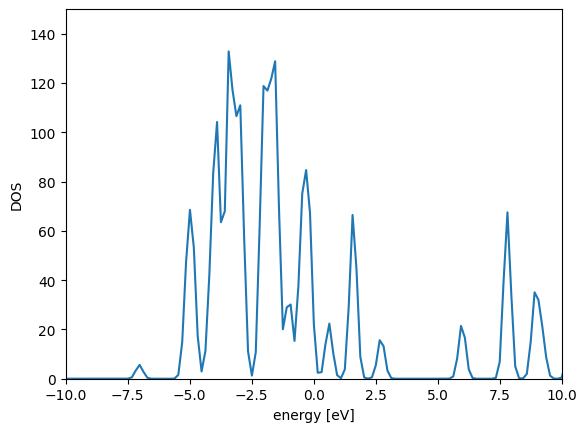

In [ ]:
import matplotlib.pyplot as plt
plt.plot(e, d)
plt.xlabel('energy [eV]')
plt.ylabel('DOS')

plt.xlim(-10, 10)
plt.ylim(0, 150)
plt.show()

In [ ]:
with open("dosdata.txt", "w") as f:
  f.writelines(f"Energy(ev)  DOS\n")
  for i in range(0,len(d)):
    f.writelines(f"{e[i]}: {d[i]}\n")
